In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from hyspexutil.features import bandutil459 as bu
from importlib import reload

In [14]:
reload(bu)

<module 'hyspexutil.features.bandutil459' from '/Users/christine/Projects/spectral_analysis/hyspexutil/features/bandutil459.py'>

In [2]:
hyspexdir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
datafile = "spectra_fortraining.pkl.gz"

In [3]:
spectra = pd.read_pickle(hyspexdir / datafile)
spectra

fid       species        event flightline                  vegclass  \
0      0  black spruce  20210803-BC         03  Open Black Spruce Forest   
1      1  black spruce  20210803-BC         03  Open Black Spruce Forest   
2      2  black spruce  20210803-BC         03  Open Black Spruce Forest   
3      3  black spruce  20210803-BC         03  Open Black Spruce Forest   
4      4    understory  20210803-BC         03  Open Black Spruce Forest   
..   ...           ...          ...        ...                       ...   
855  788         water  20200830-BC         06                     river   
856  789         water  20200830-BC         06                     river   
857  790         water  20200830-BC         06                     river   
858  791         water  20200830-BC         06                     river   
859  792         water  20200830-BC         06                     river   

        context                                           spectrum  
0         crown  [120.0, 100.0, 75.0, 109.0, 104.0, 106.0, 154....  
1         crown  [31.0, 101.0, 89.0, 133.0, 109.0, 145.0, 151.0...  
2         crown  [104.0, 78.0, 78.0, 111.0, 121.0, 94.0, 99.0, ...  
3         crown  [70.0, 95.0, 108.0, 132.0, 125.0, 131.0, 172.0...  
4    semi-shade  [55.0, 41.0, 64.0, 76.0, 102.0, 112.0, 139.0, ...  
..          ...                                                ...  
855        open  [476.0, 385.0, 474.0, 456.0, 495.0, 419.0, 504...  
856        open  [525.0, 449.0, 502.0, 528.0, 451.0, 446.0, 534...  
857        open  [412.0, 387.0, 350.0, 430.0, 448.0, 448.0, 575...  
858        open  [403.0, 386.0, 380.0, 402.0, 456.0, 462.0, 508...  
859        open  [406.0, 408.0, 419.0, 439.0, 546.0, 501.0, 572...  

[860 rows x 7 columns]

In [147]:
spectra['checksum'] = spectra.spectrum.apply(sum)
spectra = spectra[spectra.checksum > 0]

In [84]:
def get_data(event):
    if event:
        return spectra.loc[
            (spectra.event==event) & 
            (
                ((spectra.species == 'black spruce' ) & spectra.vegclass.isin(['Open Black Spruce Forest', 'Open Spruce/Tamarack Forest'])) |
                ( spectra.species == 'white spruce' ) |
                ((spectra.species == 'paper birch' ) & ( spectra.vegclass.isin(['Closed Paper Birch Forest', 'Closed Spruce/Paper Birch Forest', 'Open Spruce/Paper Birch Forest']) | spectra.vegclass.isnull())) |
                ((spectra.species == 'quaking aspen' ) & (spectra.context == 'crown')) 
            )
        ]
    else:
        return spectra.loc[
            (
                ((spectra.species == 'black spruce' ) & spectra.vegclass.isin(['Open Black Spruce Forest', 'Open Spruce/Tamarack Forest'])) |
                ( spectra.species == 'white spruce' ) |
                ((spectra.species == 'paper birch' ) & ( spectra.vegclass.isin(['Closed Paper Birch Forest', 'Closed Spruce/Paper Birch Forest', 'Open Spruce/Paper Birch Forest']) | spectra.vegclass.isnull())) |
                ((spectra.species == 'quaking aspen' ) & (spectra.context == 'crown')) 
            )
    ] 


In [148]:
data = get_data(None)
data

fid       species        event flightline                     vegclass  \
0      0  black spruce  20210803-BC         03     Open Black Spruce Forest   
1      1  black spruce  20210803-BC         03     Open Black Spruce Forest   
2      2  black spruce  20210803-BC         03     Open Black Spruce Forest   
3      3  black spruce  20210803-BC         03     Open Black Spruce Forest   
6      6  black spruce  20210803-BC         03     Open Black Spruce Forest   
..   ...           ...          ...        ...                          ...   
833  794  black spruce  20210803-BC         01  Open Spruce/Tamarack Forest   
834  795  black spruce  20210803-BC         01  Open Spruce/Tamarack Forest   
835  796  black spruce  20210803-BC         01  Open Spruce/Tamarack Forest   
836  797  black spruce  20210803-BC         01  Open Spruce/Tamarack Forest   
853  814  black spruce  20210803-BC         01  Open Spruce/Tamarack Forest   

    context                                           spectrum  checksum  
0     crown  [120.0, 100.0, 75.0, 109.0, 104.0, 106.0, 154....  563244.0  
1     crown  [31.0, 101.0, 89.0, 133.0, 109.0, 145.0, 151.0...  486640.0  
2     crown  [104.0, 78.0, 78.0, 111.0, 121.0, 94.0, 99.0, ...  466352.0  
3     crown  [70.0, 95.0, 108.0, 132.0, 125.0, 131.0, 172.0...  397712.0  
6     crown  [154.0, 92.0, 127.0, 146.0, 130.0, 130.0, 187....  575156.0  
..      ...                                                ...       ...  
833   crown  [210.0, 238.0, 219.0, 269.0, 244.0, 266.0, 318...  753478.0  
834   crown  [217.0, 183.0, 169.0, 235.0, 245.0, 247.0, 270...  664761.0  
835   crown  [172.0, 228.0, 141.0, 190.0, 218.0, 216.0, 246...  641710.0  
836   crown  [282.0, 268.0, 241.0, 247.0, 234.0, 260.0, 262...  729164.0  
853   crown  [181.0, 180.0, 142.0, 165.0, 178.0, 170.0, 198...  602650.0  

[322 rows x 8 columns]

In [149]:
data.species.value_counts()

white spruce     145
quaking aspen     74
paper birch       60
black spruce      43
Name: species, dtype: int64

In [150]:
selected_bands = bu.mlbands
selected_band_idx = bu.mlbands_idx
selected_band_idx

array([281,   9, 229,  87, 238, 363, 106,  70, 313, 412,  39, 182, 370,
         5, 217,  47, 322, 416, 105,  83, 318, 283,  19, 235,  61, 314,
       152, 369,  26, 303, 413,  41, 187,  85, 298, 282,   7, 238, 424,
       105])

In [65]:
selected_cols = [f'band_{str(ii).zfill(3)}' for ii in selected_band_idx[:-10] + 1]
selected_cols

['band_282',
 'band_010',
 'band_230',
 'band_088',
 'band_239',
 'band_364',
 'band_107',
 'band_071',
 'band_314',
 'band_413',
 'band_040',
 'band_183',
 'band_371',
 'band_006',
 'band_218',
 'band_048',
 'band_323',
 'band_417',
 'band_106',
 'band_084',
 'band_319',
 'band_284',
 'band_020',
 'band_236',
 'band_062',
 'band_315',
 'band_153',
 'band_370',
 'band_027',
 'band_304']

In [151]:
def get_sampleDF(data):

    mlsamples = []
    for idx, row in data.iterrows():
        newdic = {}
        newdic['label'] = row.species
        for bandlabel, ref in zip(selected_cols, row.spectrum[selected_band_idx[:-10] + 1]):
            newdic[bandlabel] = ref
        mlsamples.append(newdic)
    return pd.DataFrame.from_records(mlsamples)
    
get_sampleDF(data)

label  band_282  band_010  band_230  band_088  band_239  band_364  \
0    black spruce     934.0     185.0    2382.0     503.0    2191.0     451.0   
1    black spruce     836.0     158.0    2251.0     426.0    2013.0     441.0   
2    black spruce     812.0     142.0    2176.0     410.0    1945.0     311.0   
3    black spruce     576.0     181.0    1727.0     412.0    1550.0     315.0   
4    black spruce     980.0     250.0    2648.0     501.0    2337.0     278.0   
..            ...       ...       ...       ...       ...       ...       ...   
317  black spruce    1222.0     325.0    3209.0     695.0    2920.0     350.0   
318  black spruce    1303.0     316.0    2872.0     595.0    2672.0     498.0   
319  black spruce    1178.0     284.0    2865.0     523.0    2662.0     448.0   
320  black spruce    1258.0     331.0    3216.0     632.0    2924.0     358.0   
321  black spruce    1069.0     227.0    2512.0     503.0    2318.0     374.0   

     band_107  band_071  band_314  ...  band_319  band_284  band_020  \
0      2840.0     438.0    1066.0  ...    1035.0     959.0     190.0   
1      2218.0     372.0     954.0  ...     954.0     849.0     213.0   
2      2171.0     373.0     919.0  ...     917.0     824.0     162.0   
3      2058.0     385.0     683.0  ...     687.0     607.0     223.0   
4      2711.0     468.0    1108.0  ...    1067.0    1015.0     236.0   
..        ...       ...       ...  ...       ...       ...       ...   
317    3710.0     607.0    1429.0  ...    1361.0    1269.0     359.0   
318    2986.0     550.0    1452.0  ...    1489.0    1358.0     295.0   
319    2910.0     460.0    1370.0  ...    1357.0    1211.0     245.0   
320    3363.0     592.0    1482.0  ...    1433.0    1299.0     342.0   
321    3048.0     465.0    1256.0  ...    1247.0    1118.0     248.0   

     band_236  band_062  band_315  band_153  band_370  band_027  band_304  
0      2331.0     489.0    1019.0    3210.0     316.0     231.0    1217.0  
1      2141.0     416.0     912.0    2573.0     323.0     216.0    1089.0  
2      2088.0     399.0     885.0    2368.0     313.0     207.0    1055.0  
3      1681.0     427.0     666.0    2195.0     292.0     248.0     796.0  
4      2482.0     479.0    1110.0    2920.0     362.0     269.0    1267.0  
..        ...       ...       ...       ...       ...       ...       ...  
317    3129.0     673.0    1406.0    4066.0     487.0     378.0    1620.0  
318    2828.0     603.0    1439.0    3418.0     611.0     319.0    1660.0  
319    2792.0     514.0    1315.0    3243.0     510.0     297.0    1553.0  
320    3102.0     676.0    1424.0    3669.0     614.0     341.0    1662.0  
321    2417.0     520.0    1211.0    3270.0     386.0     256.0    1418.0  

[322 rows x 31 columns]

In [152]:
import sklearn
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN
import joblib

1. 2020 

In [95]:
outdir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/ML_models")

In [165]:
yr = '2020'
data = get_data('20200830-BC')
sampleDF = get_sampleDF(data)

In [166]:
X = sampleDF.drop(labels=['label'], axis=1)
y = sampleDF.label

In [167]:
np.random.seed(42)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=400, max_depth=15)
model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

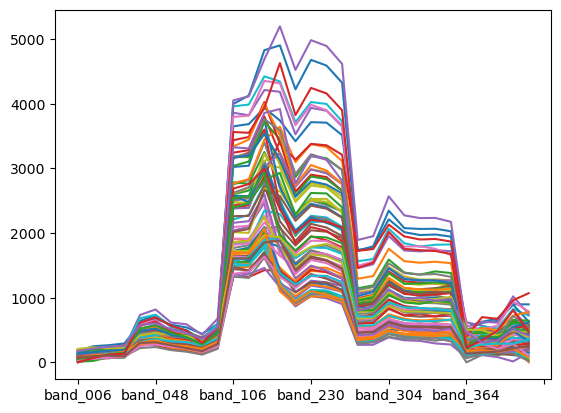

In [169]:
X_test.T.sort_index().plot(legend=False)

In [170]:
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))

0.6710526315789473
               precision    recall  f1-score   support

 black spruce       0.35      0.75      0.48         8
  paper birch       0.75      0.90      0.82        10
quaking aspen       0.70      0.70      0.70        20
 white spruce       0.81      0.58      0.68        38

     accuracy                           0.67        76
    macro avg       0.65      0.73      0.67        76
 weighted avg       0.73      0.67      0.68        76



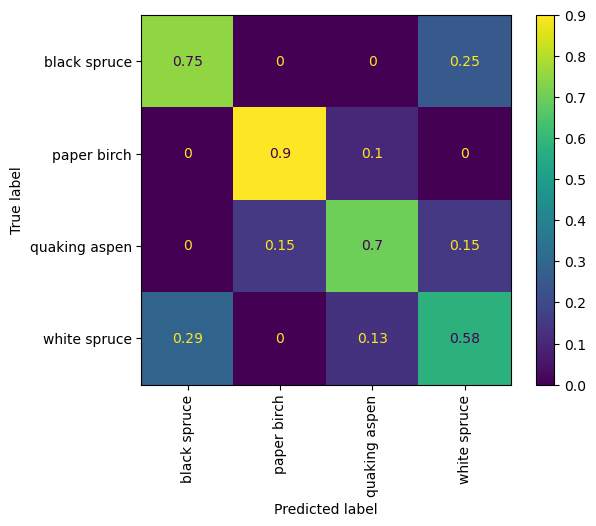

In [171]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical', normalize='true')


Text(0.5, 1.0, 'Main canopy species, BCEF, 2020')

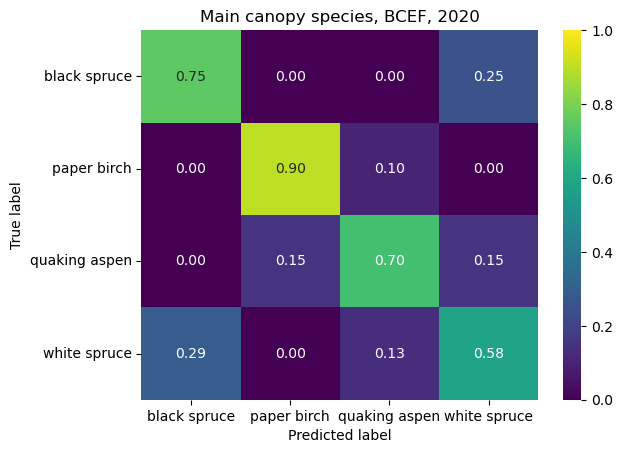

In [172]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

Text(0.5, 1.0, 'Main canopy species, BCEF, 2020')

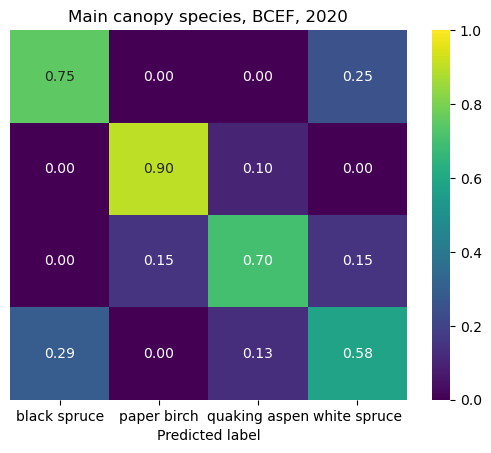

In [173]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
#plt.ylabel('True label')
ax.yaxis.set_ticks([])
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

In [99]:
joblib.dump(model, outdir / f"singlepix_main_BCEF_{yr}.pkl") 

['/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/ML_models/singlepix_main_BCEF_2020.pkl']

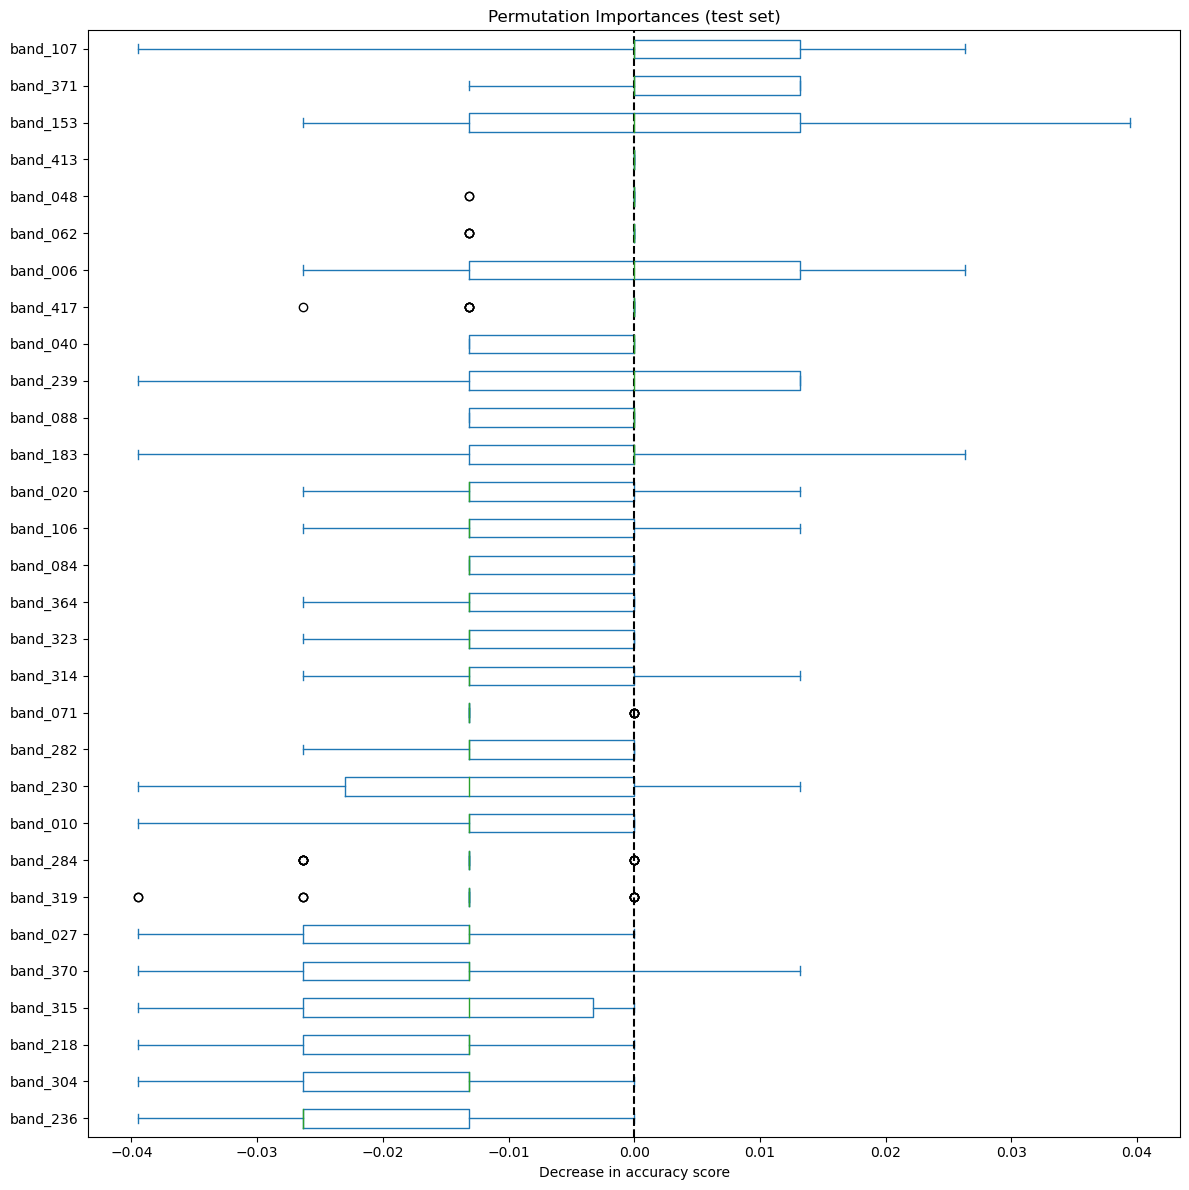

In [101]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=41, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(12, 12))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [102]:
importances.columns[::-1][:10]

Index(['band_107', 'band_371', 'band_153', 'band_413', 'band_048', 'band_062',
       'band_006', 'band_417', 'band_040', 'band_239'],
      dtype='object')

In [112]:
importantDS = sampleDF[['label'] + ['band_040', 'band_107', 'band_020', 'band_364', 'band_371',
       'band_084', 'band_218', 'band_006']]
importantDS

label  band_040  band_107  band_020  band_364  band_371  band_084  \
0    white spruce     404.0    2332.0     168.0     287.0     193.0     261.0   
1    white spruce     368.0    2094.0     143.0     317.0     219.0     240.0   
2    white spruce     346.0    2182.0     114.0     131.0     158.0     188.0   
3    white spruce     317.0    1870.0     128.0     145.0     126.0     214.0   
4    white spruce     308.0    2012.0      95.0     129.0     123.0     161.0   
..            ...       ...       ...       ...       ...       ...       ...   
185  white spruce     458.0    2460.0     199.0     521.0     424.0     308.0   
186  white spruce     444.0    2286.0     196.0     521.0     423.0     321.0   
187  black spruce     537.0    2770.0     220.0     433.0     596.0     399.0   
188  black spruce     404.0    1855.0     194.0     387.0     480.0     297.0   
189  black spruce     438.0    1859.0     192.0     475.0     504.0     299.0   

     band_218  band_006  
0      1365.0     106.0  
1      1501.0     112.0  
2      1296.0      63.0  
3      1285.0     109.0  
4      1197.0      94.0  
..        ...       ...  
185    2285.0     180.0  
186    2280.0     191.0  
187    2916.0     123.0  
188    1673.0     151.0  
189    1671.0     190.0  

[190 rows x 9 columns]

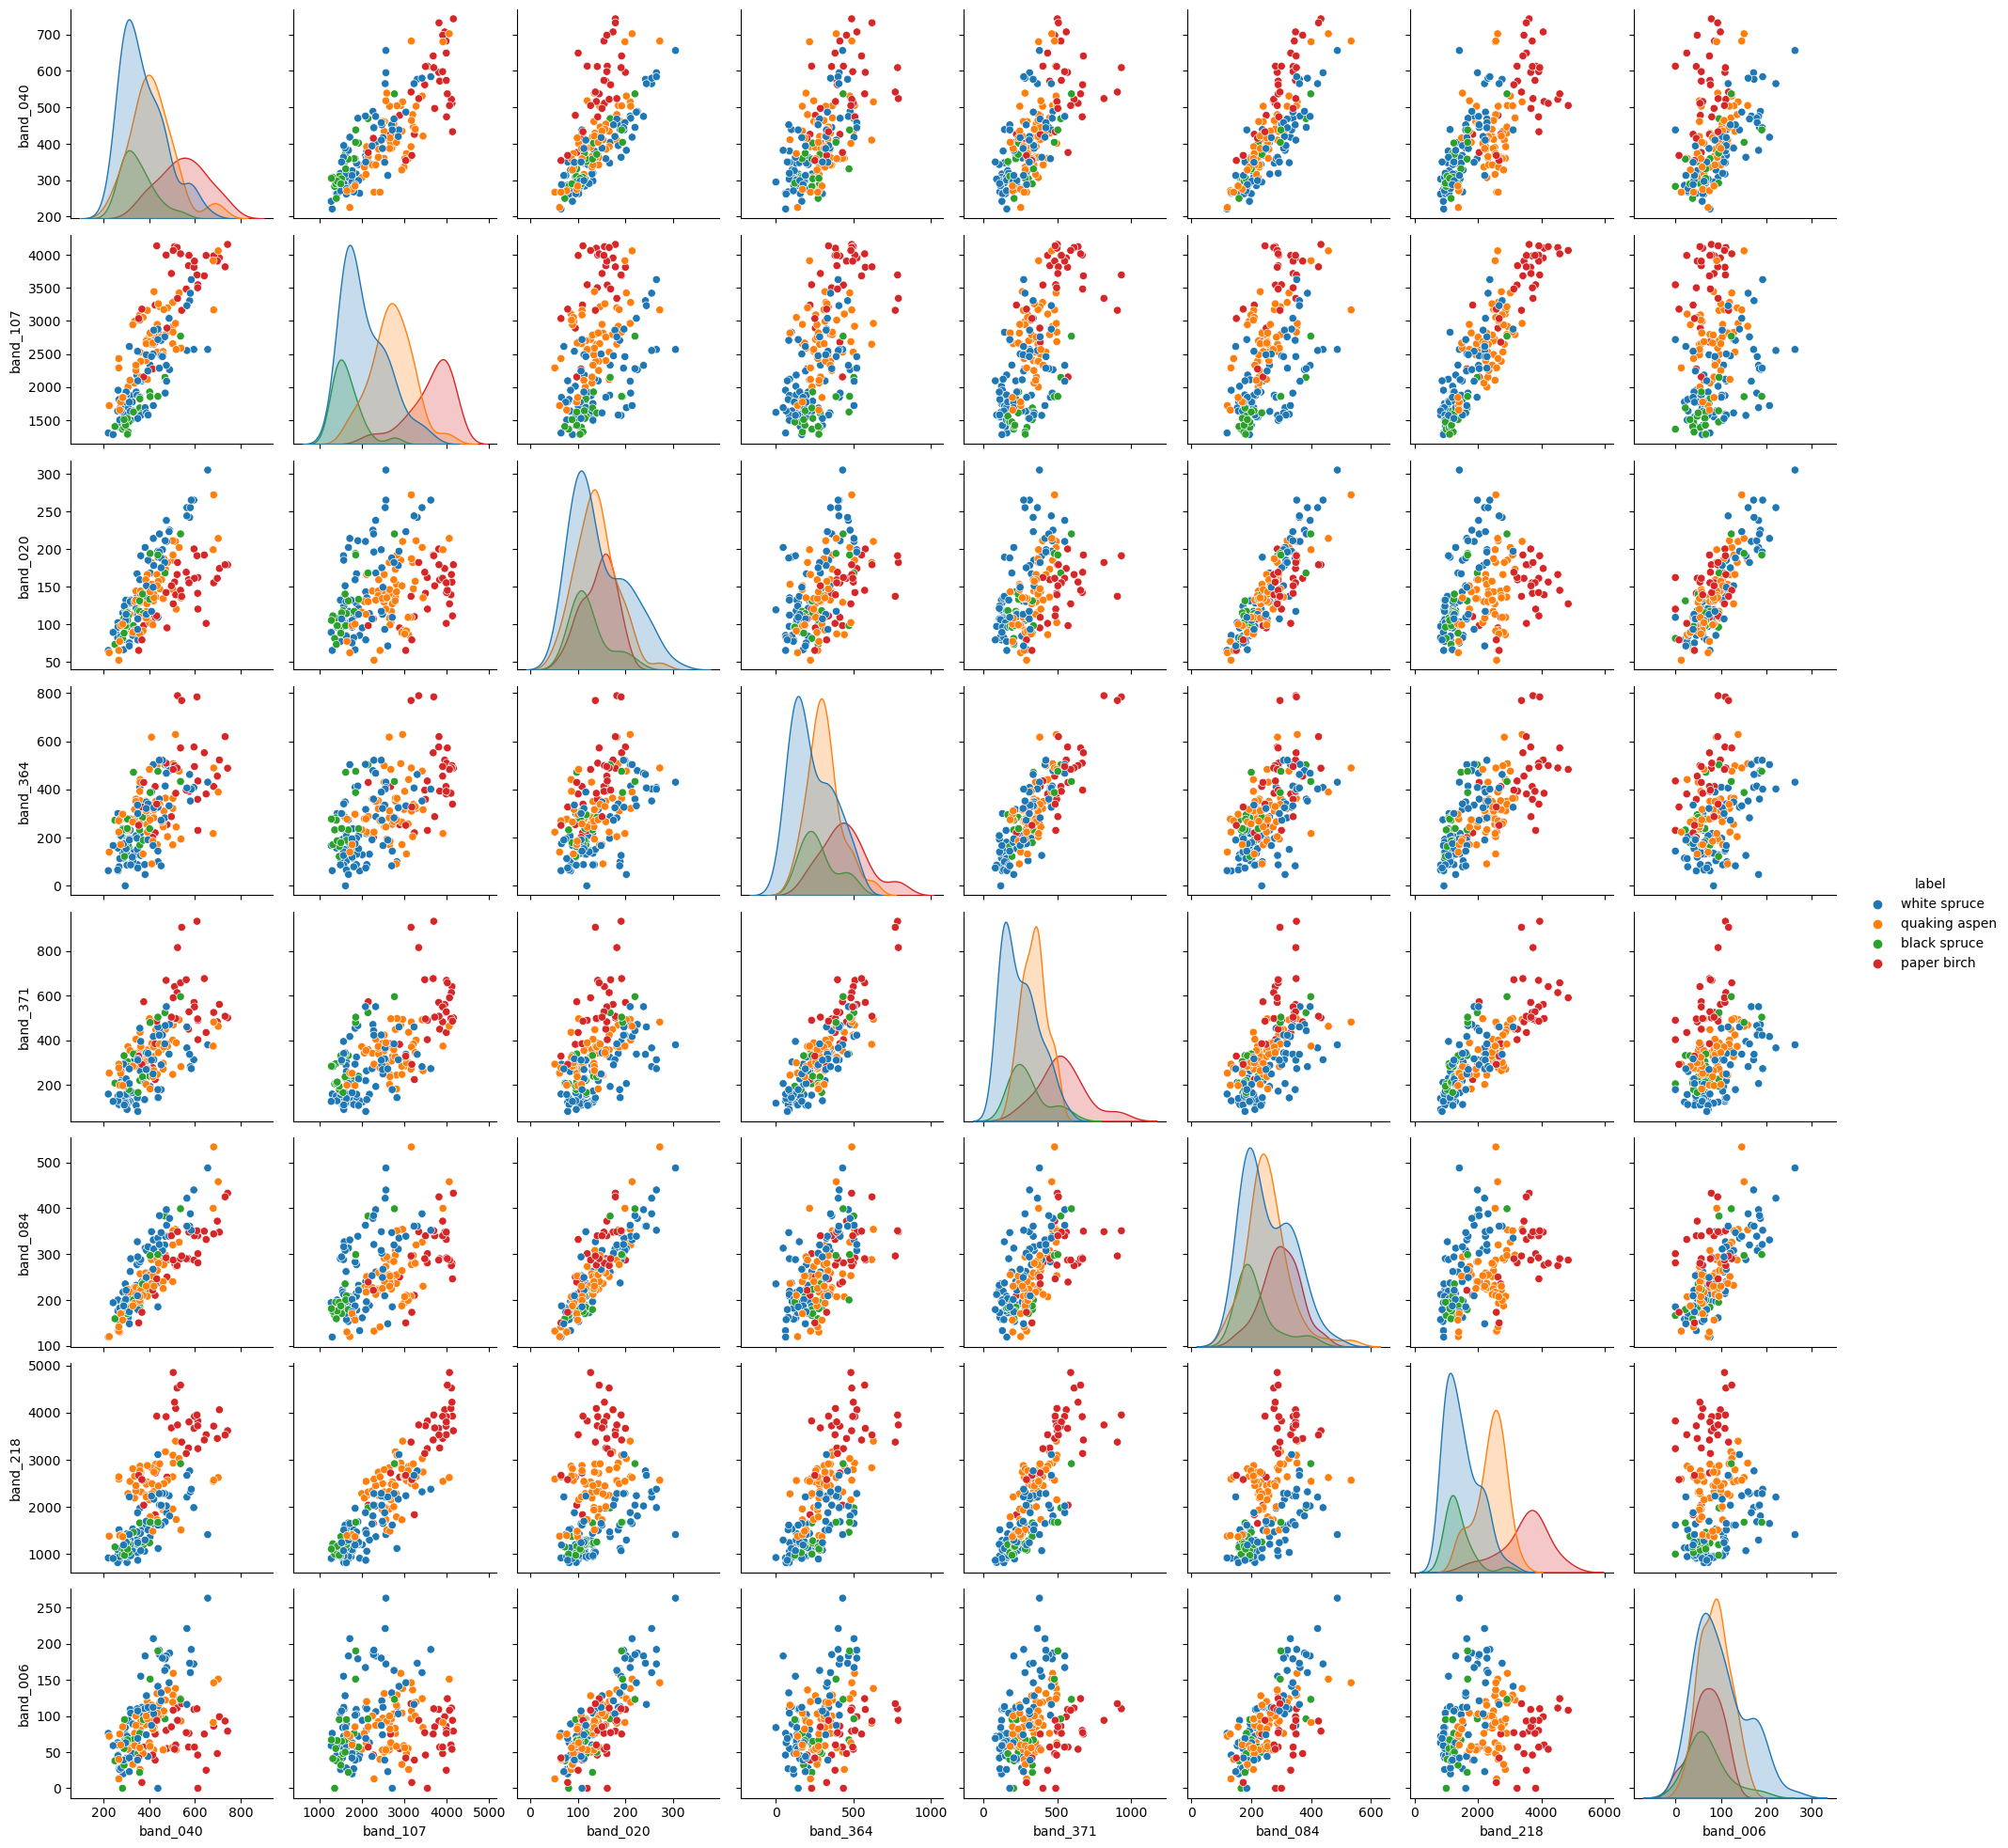

In [113]:
sb.pairplot(hue='label', data=importantDS)

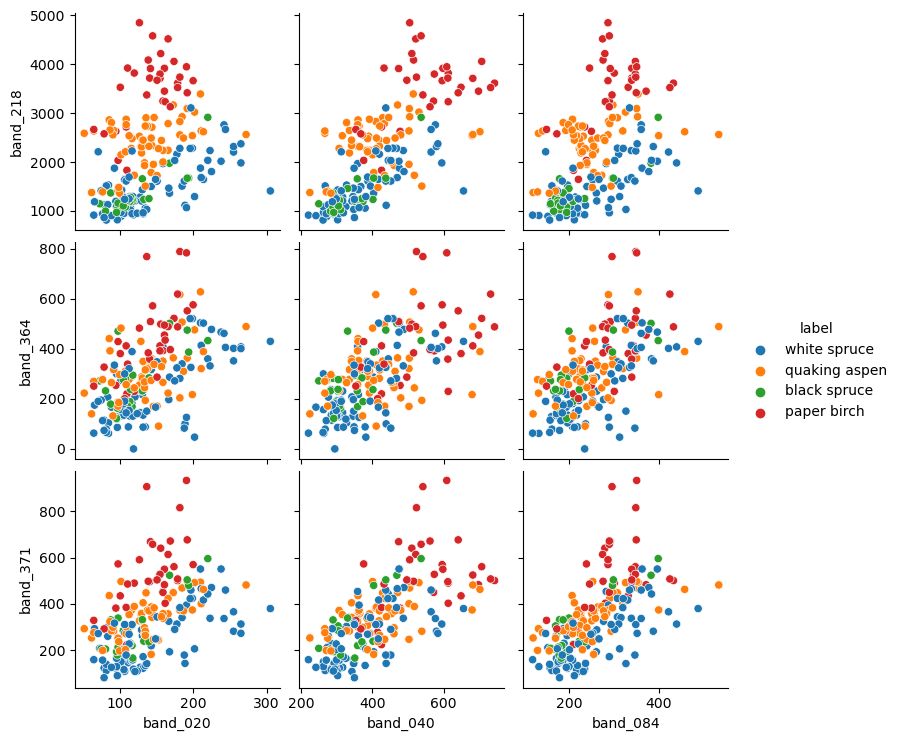

In [116]:
sb.pairplot(importantDS,
    x_vars=['band_020', 'band_040', 'band_084'],
    y_vars=['band_218', 'band_364', 'band_371'],
    hue='label')

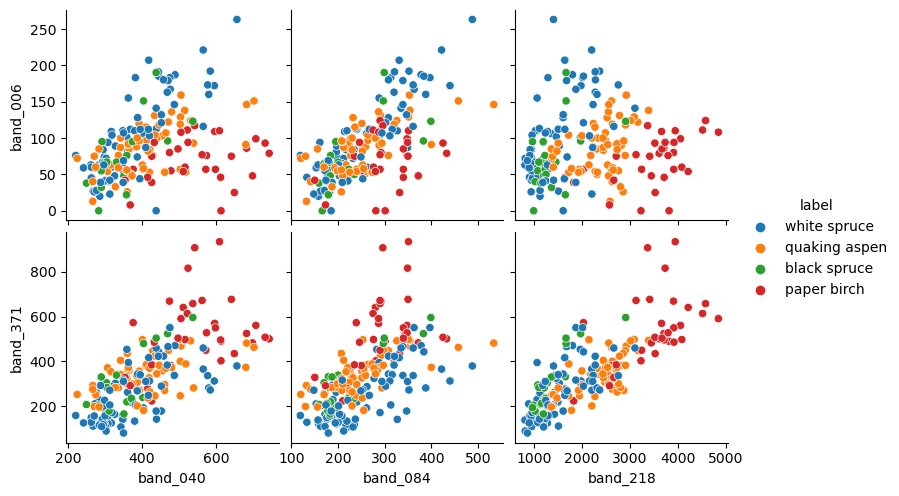

In [118]:
sb.pairplot(importantDS,
    x_vars=['band_040', 'band_084', 'band_218'],
    y_vars=['band_006', 'band_371'],
    hue='label')

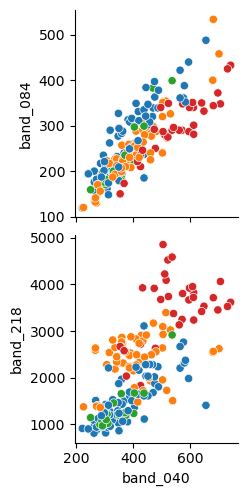

In [119]:
ax = sb.pairplot(importantDS,
    x_vars=['band_040', ],
    y_vars=['band_084', 'band_218'],
    hue='label')
ax._legend.remove()

1. 2021

In [174]:
yr = '2021'
data = get_data('20210803-BC')
sampleDF = get_sampleDF(data)

In [175]:
sampleDF

label  band_282  band_010  band_230  band_088  band_239  band_364  \
0    black spruce     934.0     185.0    2382.0     503.0    2191.0     451.0   
1    black spruce     836.0     158.0    2251.0     426.0    2013.0     441.0   
2    black spruce     812.0     142.0    2176.0     410.0    1945.0     311.0   
3    black spruce     576.0     181.0    1727.0     412.0    1550.0     315.0   
4    black spruce     980.0     250.0    2648.0     501.0    2337.0     278.0   
..            ...       ...       ...       ...       ...       ...       ...   
127  black spruce    1222.0     325.0    3209.0     695.0    2920.0     350.0   
128  black spruce    1303.0     316.0    2872.0     595.0    2672.0     498.0   
129  black spruce    1178.0     284.0    2865.0     523.0    2662.0     448.0   
130  black spruce    1258.0     331.0    3216.0     632.0    2924.0     358.0   
131  black spruce    1069.0     227.0    2512.0     503.0    2318.0     374.0   

     band_107  band_071  band_314  ...  band_319  band_284  band_020  \
0      2840.0     438.0    1066.0  ...    1035.0     959.0     190.0   
1      2218.0     372.0     954.0  ...     954.0     849.0     213.0   
2      2171.0     373.0     919.0  ...     917.0     824.0     162.0   
3      2058.0     385.0     683.0  ...     687.0     607.0     223.0   
4      2711.0     468.0    1108.0  ...    1067.0    1015.0     236.0   
..        ...       ...       ...  ...       ...       ...       ...   
127    3710.0     607.0    1429.0  ...    1361.0    1269.0     359.0   
128    2986.0     550.0    1452.0  ...    1489.0    1358.0     295.0   
129    2910.0     460.0    1370.0  ...    1357.0    1211.0     245.0   
130    3363.0     592.0    1482.0  ...    1433.0    1299.0     342.0   
131    3048.0     465.0    1256.0  ...    1247.0    1118.0     248.0   

     band_236  band_062  band_315  band_153  band_370  band_027  band_304  
0      2331.0     489.0    1019.0    3210.0     316.0     231.0    1217.0  
1      2141.0     416.0     912.0    2573.0     323.0     216.0    1089.0  
2      2088.0     399.0     885.0    2368.0     313.0     207.0    1055.0  
3      1681.0     427.0     666.0    2195.0     292.0     248.0     796.0  
4      2482.0     479.0    1110.0    2920.0     362.0     269.0    1267.0  
..        ...       ...       ...       ...       ...       ...       ...  
127    3129.0     673.0    1406.0    4066.0     487.0     378.0    1620.0  
128    2828.0     603.0    1439.0    3418.0     611.0     319.0    1660.0  
129    2792.0     514.0    1315.0    3243.0     510.0     297.0    1553.0  
130    3102.0     676.0    1424.0    3669.0     614.0     341.0    1662.0  
131    2417.0     520.0    1211.0    3270.0     386.0     256.0    1418.0  

[132 rows x 31 columns]

In [176]:
X = sampleDF.drop(labels=['label'], axis=1)
y = sampleDF.label

In [177]:
np.random.seed(42)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=400, max_depth=15)
model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

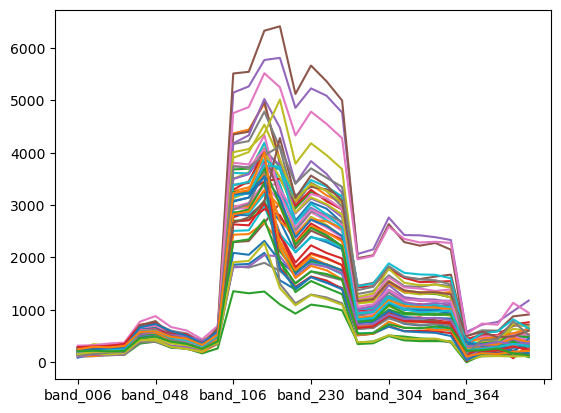

In [179]:
X_test.T.sort_index().plot(legend=False)

In [180]:
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))

0.8301886792452831
               precision    recall  f1-score   support

 black spruce       0.67      0.89      0.76         9
  paper birch       0.73      0.80      0.76        10
quaking aspen       0.80      0.80      0.80         5
 white spruce       0.96      0.83      0.89        29

     accuracy                           0.83        53
    macro avg       0.79      0.83      0.80        53
 weighted avg       0.85      0.83      0.83        53



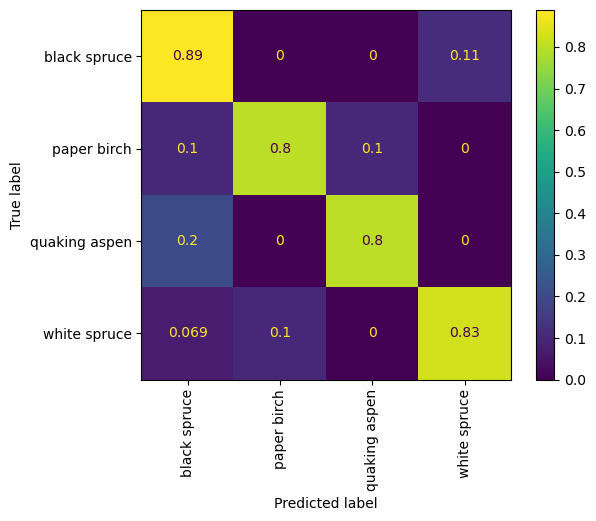

In [181]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical', normalize='true')


Text(0.5, 1.0, 'Main canopy species, BCEF, 2021')

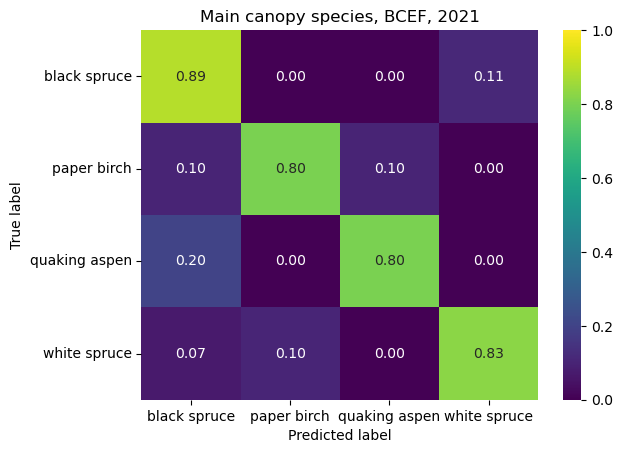

In [182]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

Text(0.5, 1.0, 'Main canopy species, BCEF, 2021')

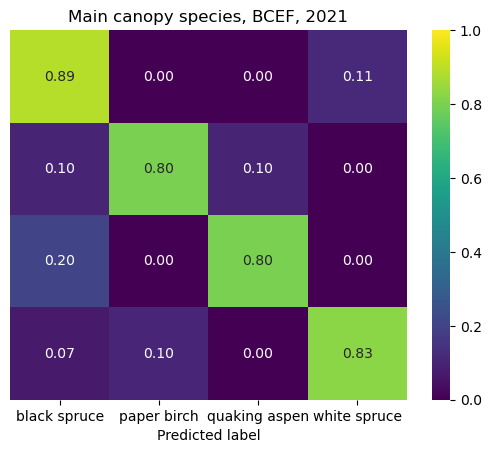

In [183]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
#plt.ylabel('True label')
ax.yaxis.set_ticks([])
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

In [184]:
joblib.dump(model, outdir / f"singlepix_main_BCEF_{yr}.pkl") 

['/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/ML_models/singlepix_main_BCEF_2021.pkl']

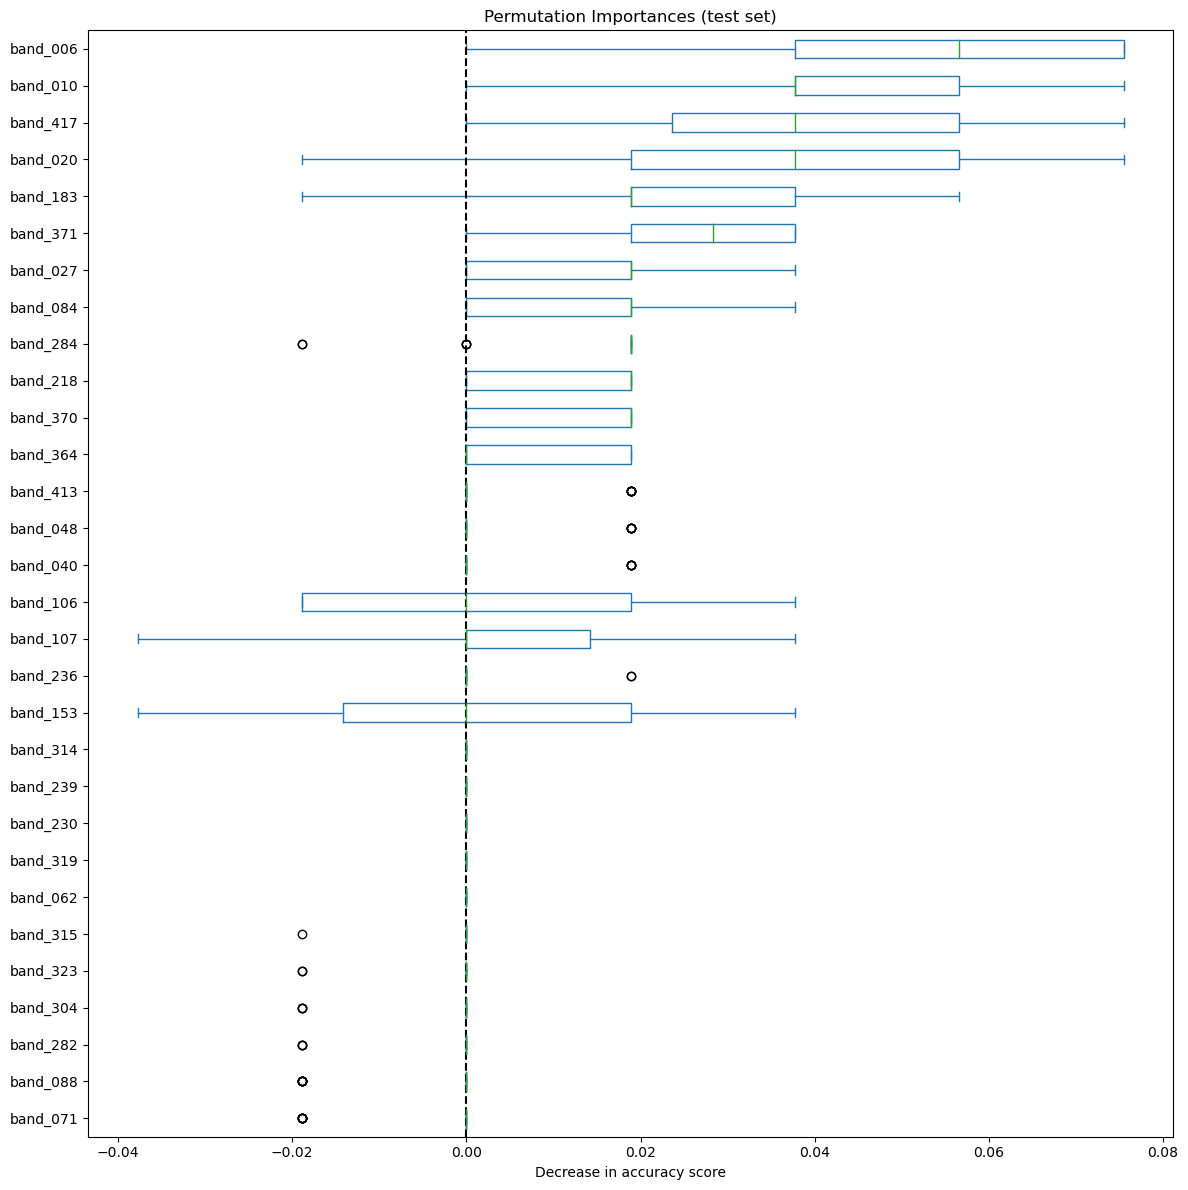

In [185]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=41, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(12, 12))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [186]:
importances.columns[::-1][:10]

Index(['band_006', 'band_010', 'band_417', 'band_020', 'band_183', 'band_371',
       'band_027', 'band_084', 'band_284', 'band_218'],
      dtype='object')

In [187]:
importantDS = sampleDF[['label'] + ['band_040', 'band_107', 'band_020', 'band_364', 'band_371',
       'band_084', 'band_218', 'band_006']]
importantDS

label  band_040  band_107  band_020  band_364  band_371  band_084  \
0    black spruce     571.0    2840.0     190.0     451.0     387.0     325.0   
1    black spruce     469.0    2218.0     213.0     441.0     381.0     282.0   
2    black spruce     454.0    2171.0     162.0     311.0     357.0     272.0   
3    black spruce     497.0    2058.0     223.0     315.0     238.0     257.0   
4    black spruce     597.0    2711.0     236.0     278.0     422.0     330.0   
..            ...       ...       ...       ...       ...       ...       ...   
127  black spruce     776.0    3710.0     359.0     350.0     509.0     439.0   
128  black spruce     692.0    2986.0     295.0     498.0     604.0     399.0   
129  black spruce     647.0    2910.0     245.0     448.0     496.0     334.0   
130  black spruce     764.0    3363.0     342.0     358.0     576.0     407.0   
131  black spruce     656.0    3048.0     248.0     374.0     403.0     289.0   

     band_218  band_006  
0      2105.0     154.0  
1      1977.0     151.0  
2      1894.0      99.0  
3      1519.0     172.0  
4      2298.0     187.0  
..        ...       ...  
127    2840.0     318.0  
128    2531.0     270.0  
129    2488.0     246.0  
130    2834.0     262.0  
131    2287.0     198.0  

[132 rows x 9 columns]

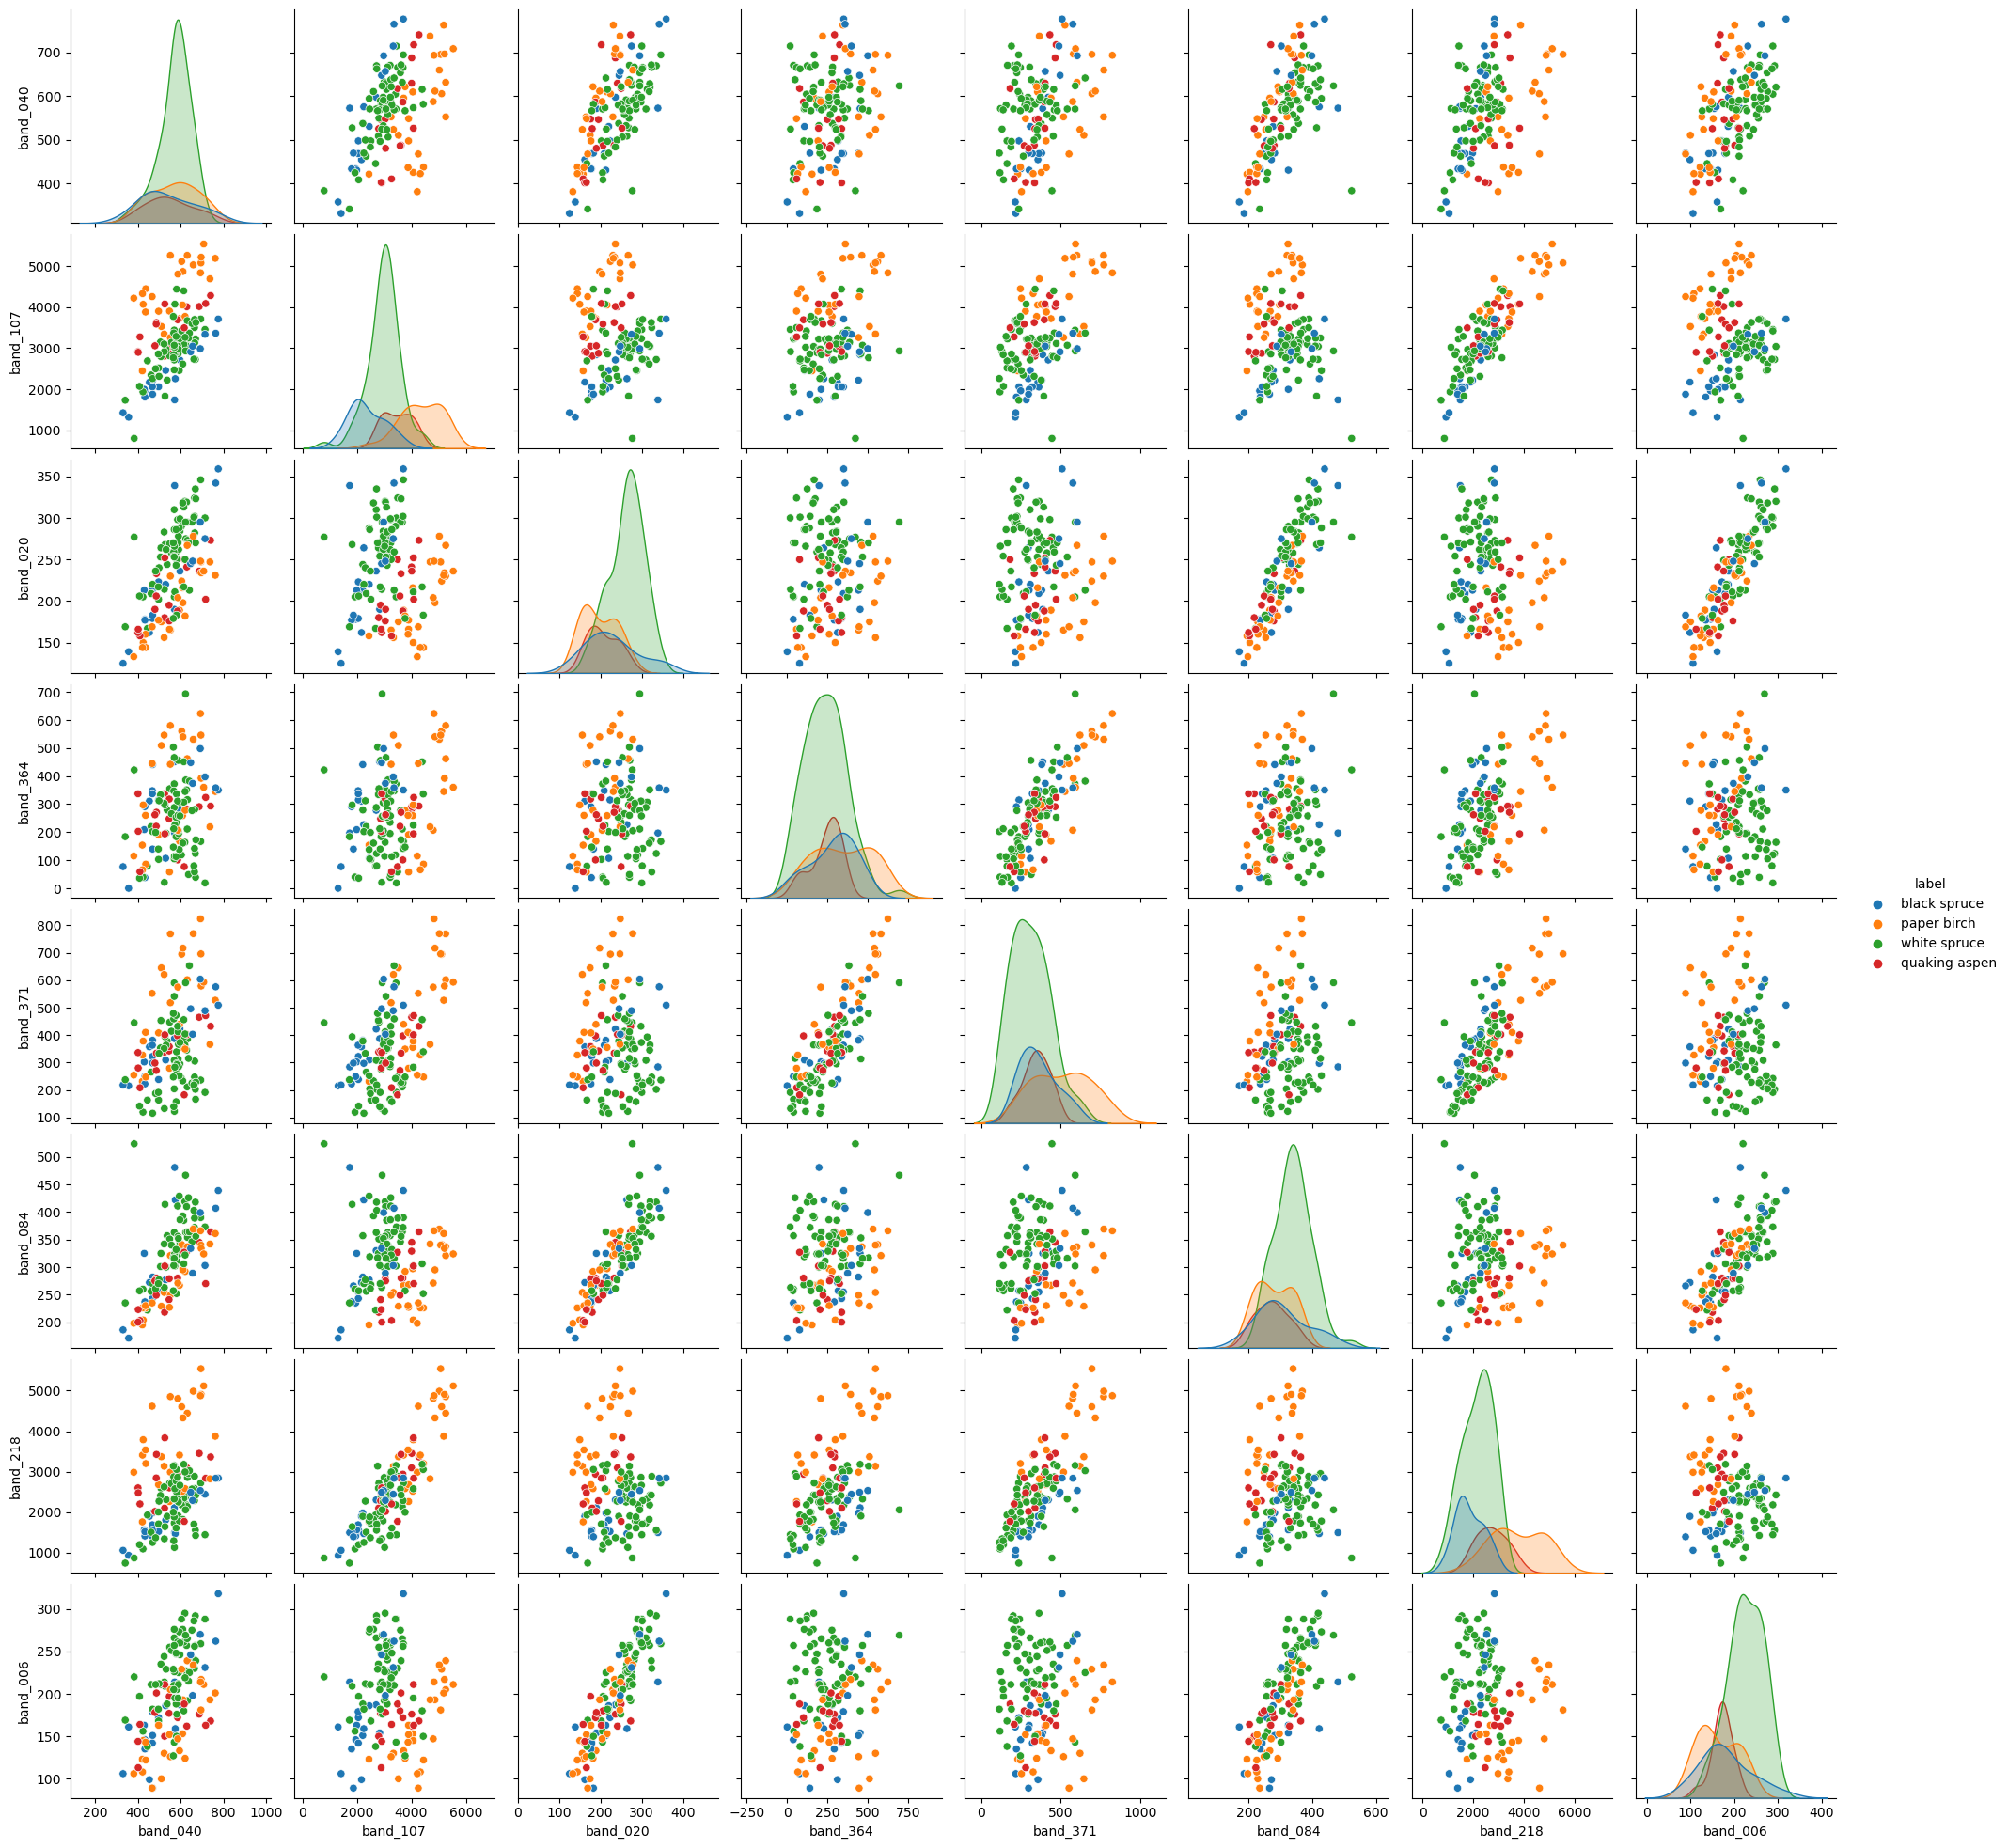

In [188]:
sb.pairplot(hue='label', data=importantDS)

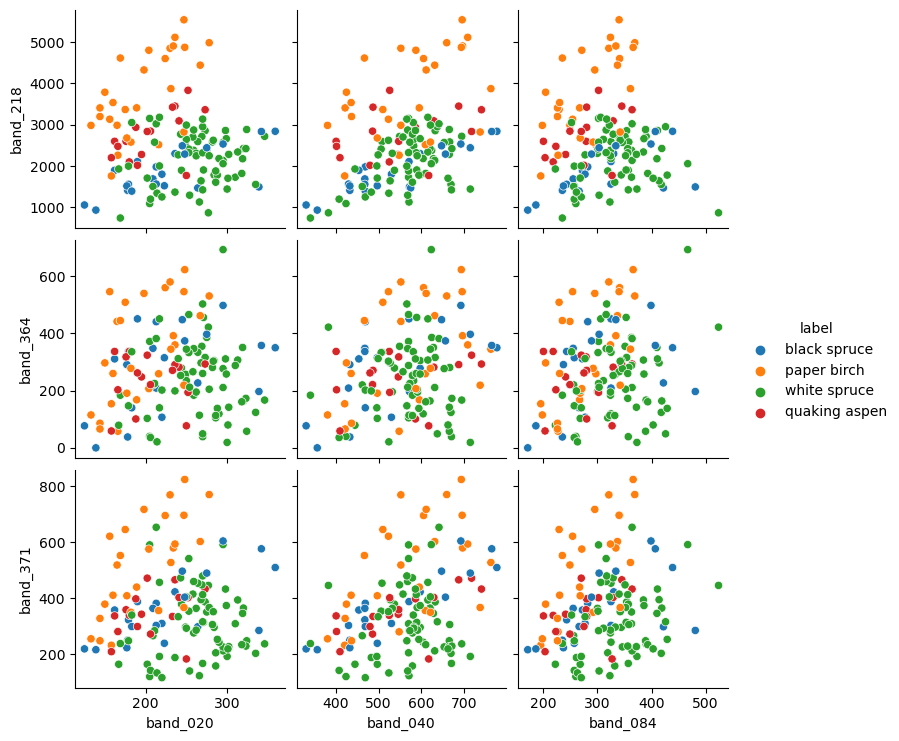

In [189]:
sb.pairplot(importantDS,
    x_vars=['band_020', 'band_040', 'band_084'],
    y_vars=['band_218', 'band_364', 'band_371'],
    hue='label')

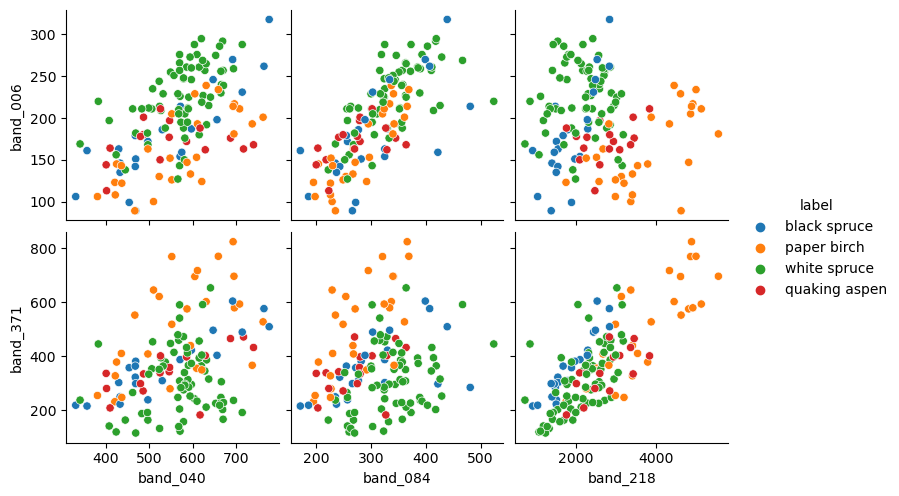

In [190]:
sb.pairplot(importantDS,
    x_vars=['band_040', 'band_084', 'band_218'],
    y_vars=['band_006', 'band_371'],
    hue='label')

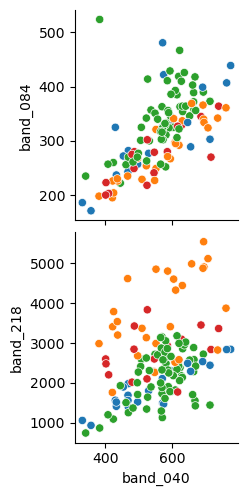

In [192]:
ax = sb.pairplot(importantDS,
    x_vars=['band_040', ],
    y_vars=['band_084', 'band_218'],
    hue='label')
ax._legend.remove()

In [193]:
yr = '2020 & 2021'
data = get_data(None)
sampleDF = get_sampleDF(data)

In [194]:
sampleDF

label  band_282  band_010  band_230  band_088  band_239  band_364  \
0    black spruce     934.0     185.0    2382.0     503.0    2191.0     451.0   
1    black spruce     836.0     158.0    2251.0     426.0    2013.0     441.0   
2    black spruce     812.0     142.0    2176.0     410.0    1945.0     311.0   
3    black spruce     576.0     181.0    1727.0     412.0    1550.0     315.0   
4    black spruce     980.0     250.0    2648.0     501.0    2337.0     278.0   
..            ...       ...       ...       ...       ...       ...       ...   
317  black spruce    1222.0     325.0    3209.0     695.0    2920.0     350.0   
318  black spruce    1303.0     316.0    2872.0     595.0    2672.0     498.0   
319  black spruce    1178.0     284.0    2865.0     523.0    2662.0     448.0   
320  black spruce    1258.0     331.0    3216.0     632.0    2924.0     358.0   
321  black spruce    1069.0     227.0    2512.0     503.0    2318.0     374.0   

     band_107  band_071  band_314  ...  band_319  band_284  band_020  \
0      2840.0     438.0    1066.0  ...    1035.0     959.0     190.0   
1      2218.0     372.0     954.0  ...     954.0     849.0     213.0   
2      2171.0     373.0     919.0  ...     917.0     824.0     162.0   
3      2058.0     385.0     683.0  ...     687.0     607.0     223.0   
4      2711.0     468.0    1108.0  ...    1067.0    1015.0     236.0   
..        ...       ...       ...  ...       ...       ...       ...   
317    3710.0     607.0    1429.0  ...    1361.0    1269.0     359.0   
318    2986.0     550.0    1452.0  ...    1489.0    1358.0     295.0   
319    2910.0     460.0    1370.0  ...    1357.0    1211.0     245.0   
320    3363.0     592.0    1482.0  ...    1433.0    1299.0     342.0   
321    3048.0     465.0    1256.0  ...    1247.0    1118.0     248.0   

     band_236  band_062  band_315  band_153  band_370  band_027  band_304  
0      2331.0     489.0    1019.0    3210.0     316.0     231.0    1217.0  
1      2141.0     416.0     912.0    2573.0     323.0     216.0    1089.0  
2      2088.0     399.0     885.0    2368.0     313.0     207.0    1055.0  
3      1681.0     427.0     666.0    2195.0     292.0     248.0     796.0  
4      2482.0     479.0    1110.0    2920.0     362.0     269.0    1267.0  
..        ...       ...       ...       ...       ...       ...       ...  
317    3129.0     673.0    1406.0    4066.0     487.0     378.0    1620.0  
318    2828.0     603.0    1439.0    3418.0     611.0     319.0    1660.0  
319    2792.0     514.0    1315.0    3243.0     510.0     297.0    1553.0  
320    3102.0     676.0    1424.0    3669.0     614.0     341.0    1662.0  
321    2417.0     520.0    1211.0    3270.0     386.0     256.0    1418.0  

[322 rows x 31 columns]

In [195]:
X = sampleDF.drop(labels=['label'], axis=1)
y = sampleDF.label

In [196]:
np.random.seed(42)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=400, max_depth=15)
model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

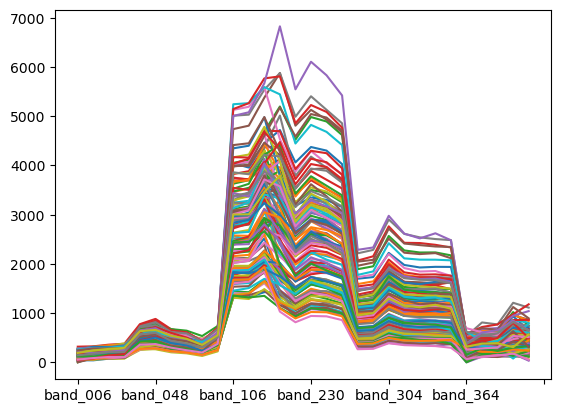

In [198]:
X_test.T.sort_index().plot(legend=False)

In [199]:
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))

0.7131782945736435
               precision    recall  f1-score   support

 black spruce       0.56      0.75      0.64        20
  paper birch       0.81      0.88      0.84        24
quaking aspen       0.67      0.67      0.67        24
 white spruce       0.77      0.66      0.71        61

     accuracy                           0.71       129
    macro avg       0.70      0.74      0.71       129
 weighted avg       0.72      0.71      0.71       129



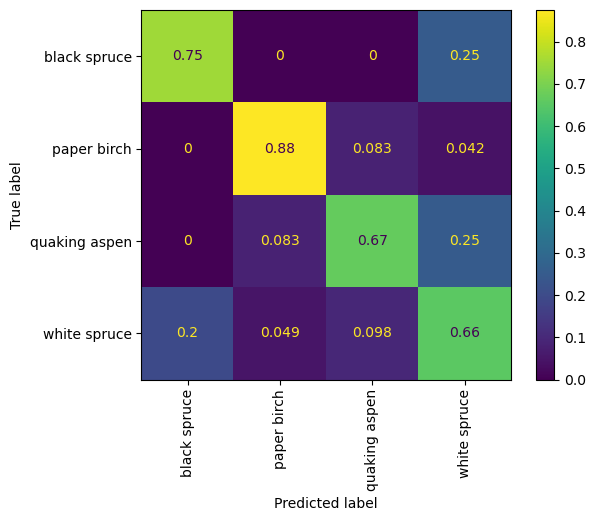

In [200]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical', normalize='true')


Text(0.5, 1.0, 'Main canopy species, BCEF, 2020 & 2021')

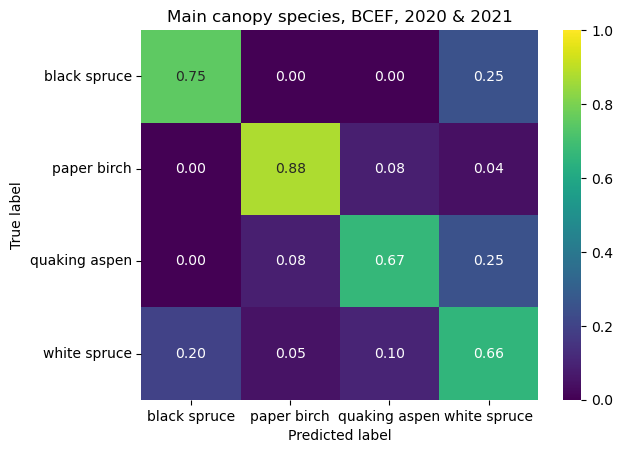

In [201]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

Text(0.5, 1.0, 'Main canopy species, BCEF, 2020 & 2021')

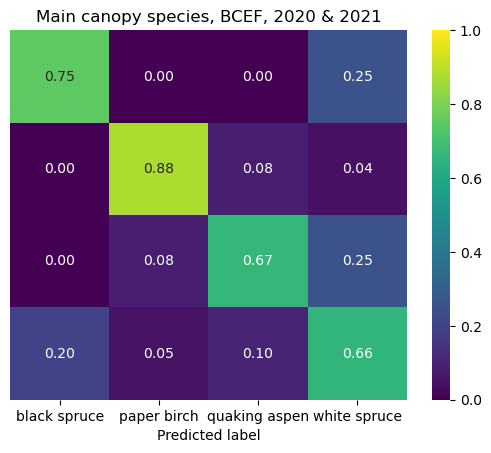

In [202]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
#plt.ylabel('True label')
ax.yaxis.set_ticks([])
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title(f"Main canopy species, BCEF, {yr}")

In [204]:
joblib.dump(model, outdir / f"singlepix_main_BCEF_{yr.replace(' & ', '_')}.pkl") 

['/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/ML_models/singlepix_main_BCEF_2020_2021.pkl']

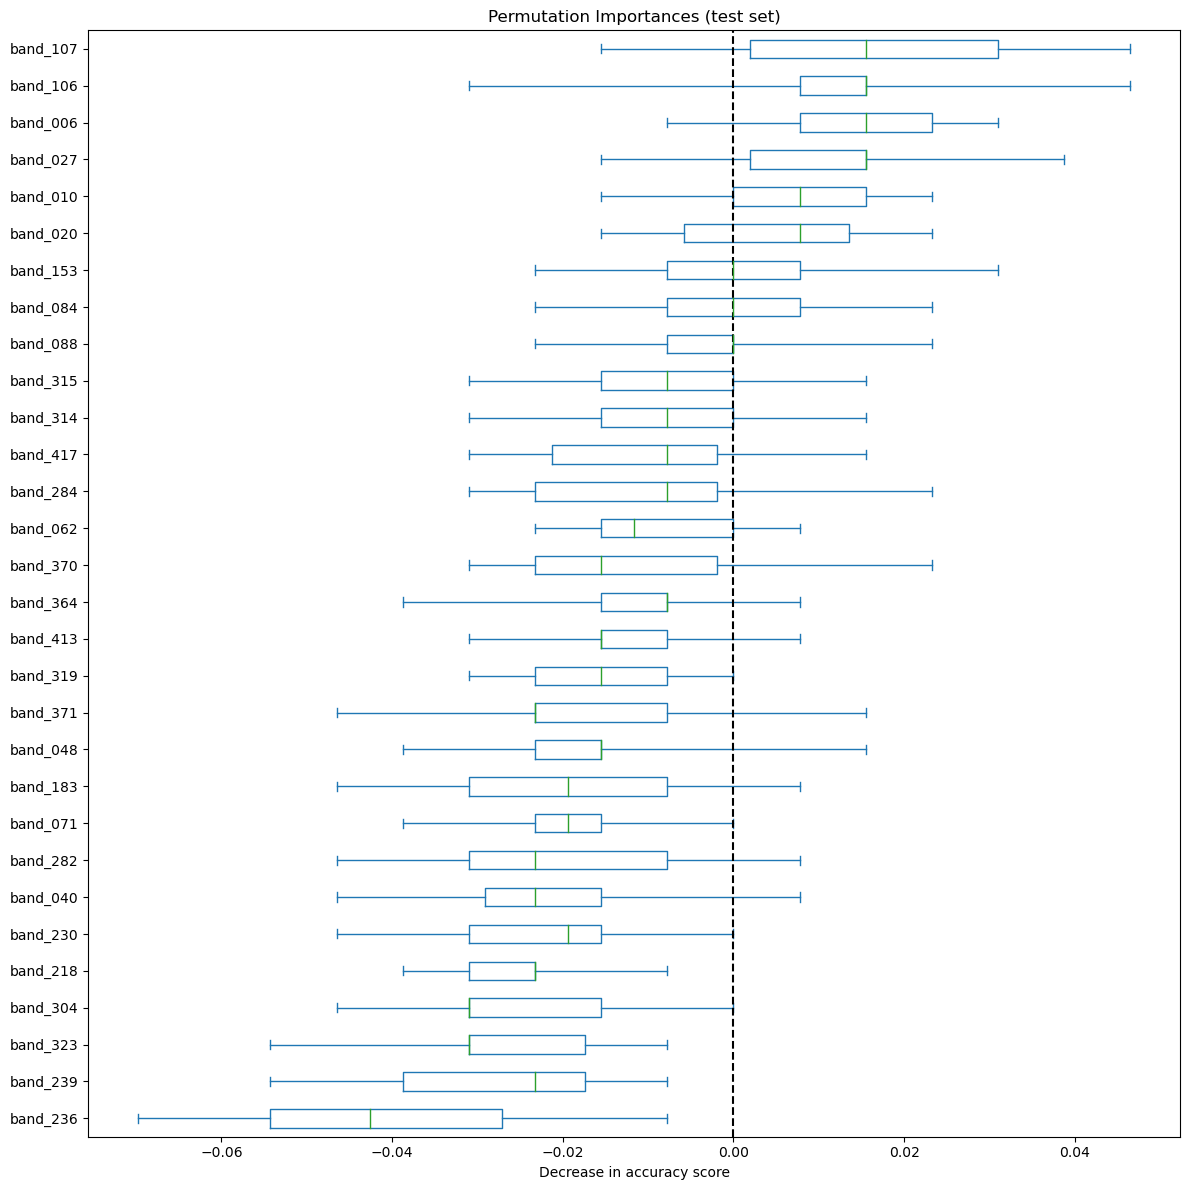

In [205]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=41, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(12, 12))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [ ]:
importances.columns[::-1][:10]

Index(['band_006', 'band_010', 'band_417', 'band_020', 'band_183', 'band_371',
       'band_027', 'band_084', 'band_284', 'band_218'],
      dtype='object')

In [211]:
importantDS = sampleDF[['label'] + ['band_040', 'band_107', 'band_020', 'band_364', 'band_371',
       'band_084', 'band_218', 'band_006', 'band_106']]
importantDS

label  band_040  band_107  band_020  band_364  band_371  band_084  \
0    black spruce     571.0    2840.0     190.0     451.0     387.0     325.0   
1    black spruce     469.0    2218.0     213.0     441.0     381.0     282.0   
2    black spruce     454.0    2171.0     162.0     311.0     357.0     272.0   
3    black spruce     497.0    2058.0     223.0     315.0     238.0     257.0   
4    black spruce     597.0    2711.0     236.0     278.0     422.0     330.0   
..            ...       ...       ...       ...       ...       ...       ...   
317  black spruce     776.0    3710.0     359.0     350.0     509.0     439.0   
318  black spruce     692.0    2986.0     295.0     498.0     604.0     399.0   
319  black spruce     647.0    2910.0     245.0     448.0     496.0     334.0   
320  black spruce     764.0    3363.0     342.0     358.0     576.0     407.0   
321  black spruce     656.0    3048.0     248.0     374.0     403.0     289.0   

     band_218  band_006  band_106  
0      2105.0     154.0    2866.0  
1      1977.0     151.0    2249.0  
2      1894.0      99.0    2157.0  
3      1519.0     172.0    2021.0  
4      2298.0     187.0    2682.0  
..        ...       ...       ...  
317    2840.0     318.0    3751.0  
318    2531.0     270.0    2970.0  
319    2488.0     246.0    2883.0  
320    2834.0     262.0    3294.0  
321    2287.0     198.0    3047.0  

[322 rows x 10 columns]

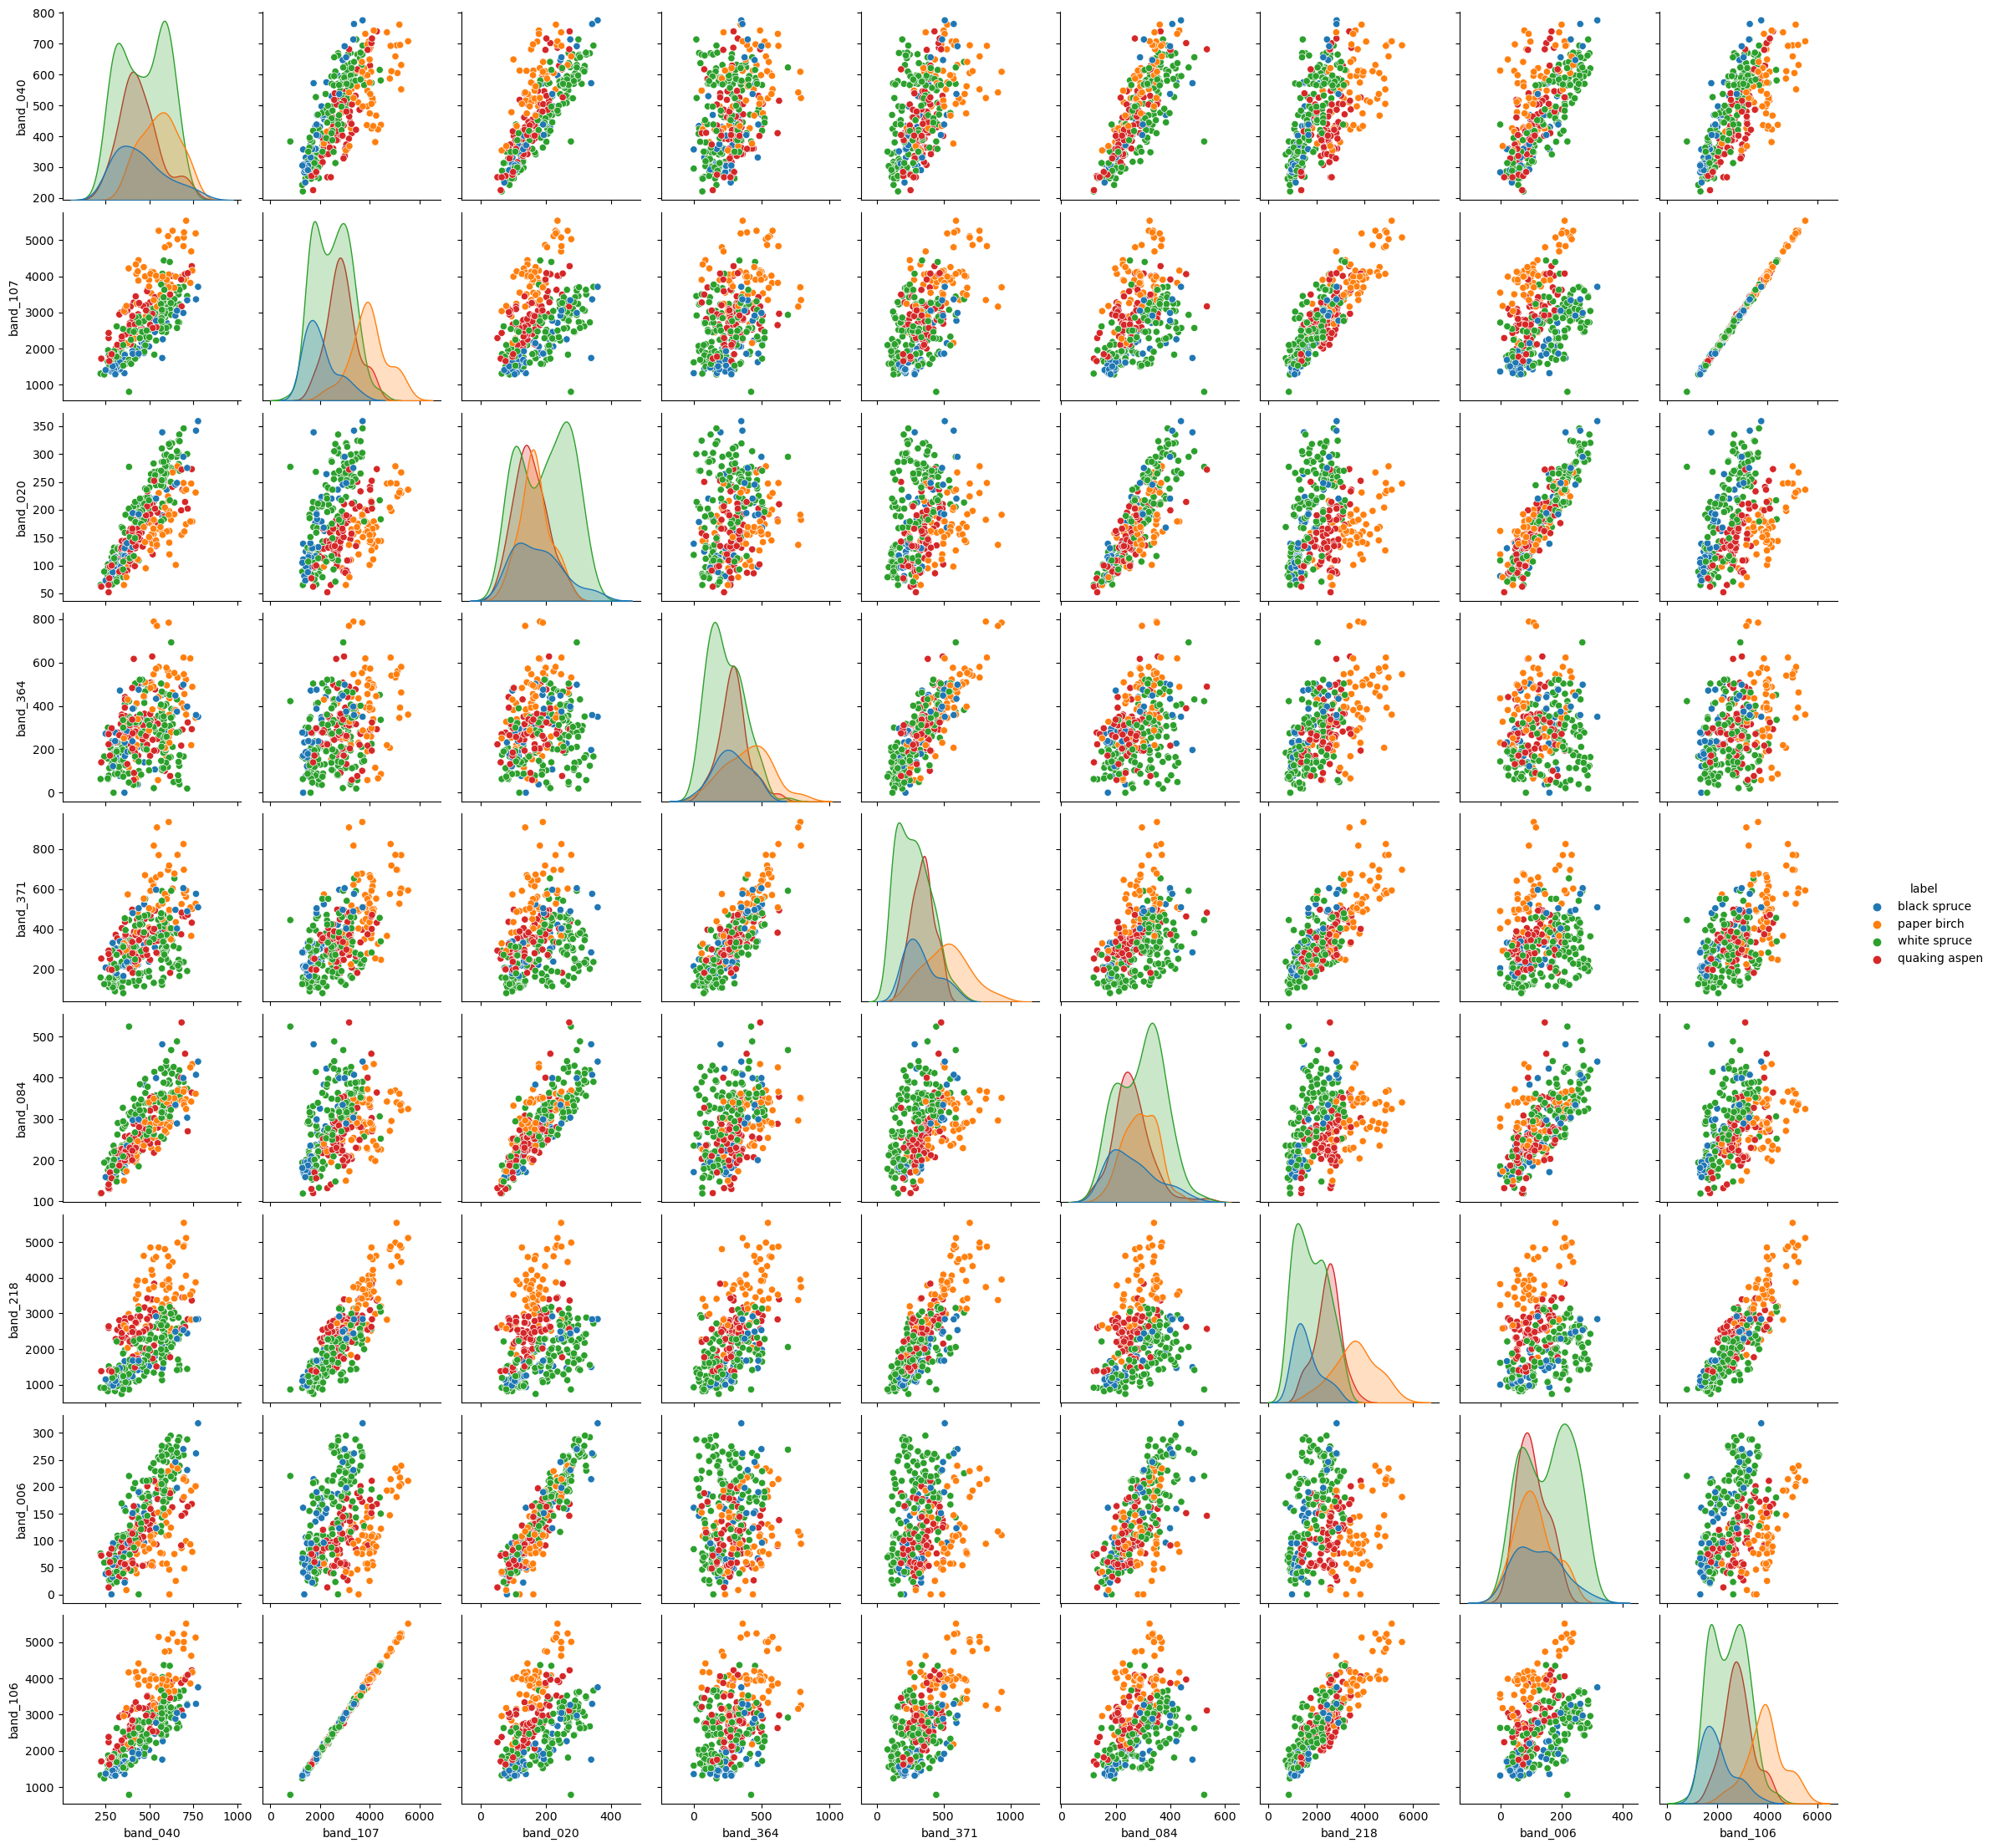

In [219]:
sb.pairplot(hue='label', data=importantDS)

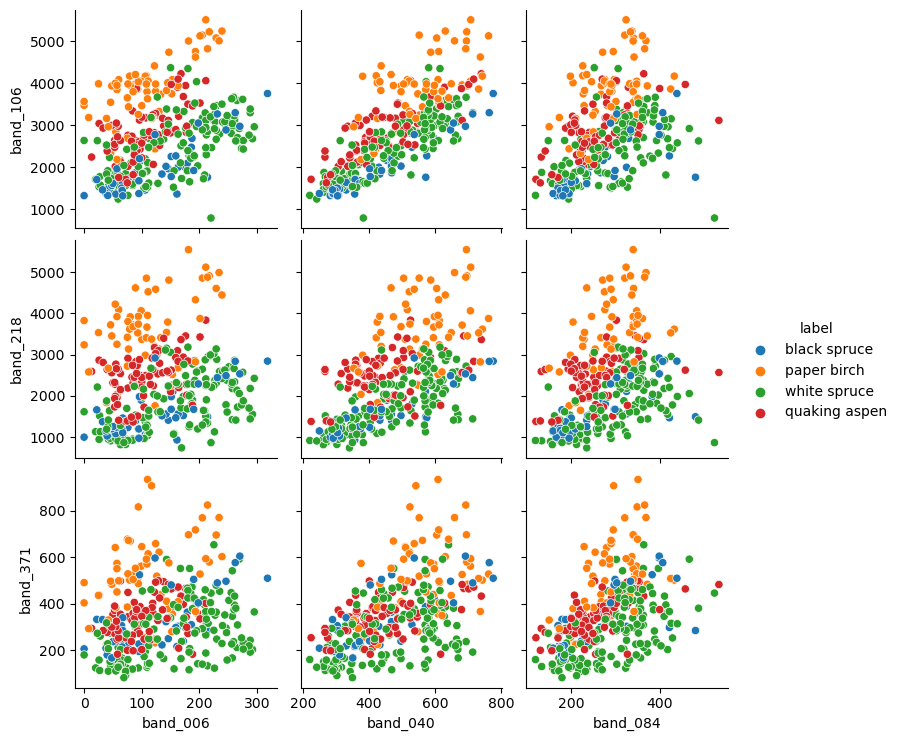

In [214]:
sb.pairplot(importantDS,
    x_vars=['band_006', 'band_040', 'band_084'],
    y_vars=['band_106', 'band_218', 'band_371'],
    hue='label')

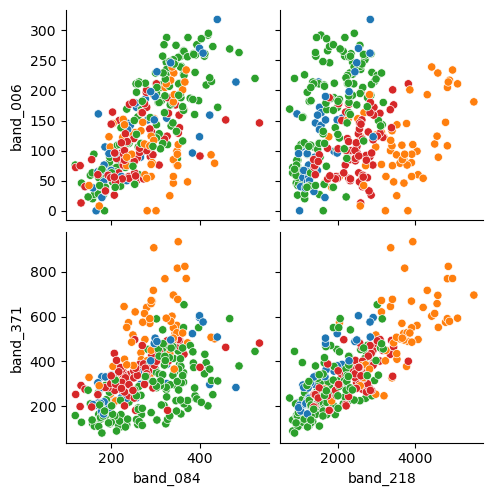

In [218]:
ax = sb.pairplot(importantDS,
    x_vars=['band_084', 'band_218'],
    y_vars=['band_006', 'band_371'],
    hue='label')
ax._legend.remove()

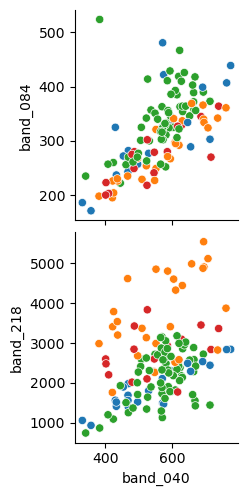

In [ ]:
ax = sb.pairplot(importantDS,
    x_vars=['band_040', ],
    y_vars=['band_084', 'band_218'],
    hue='label')
ax._legend.remove()

<AxesSubplot:>

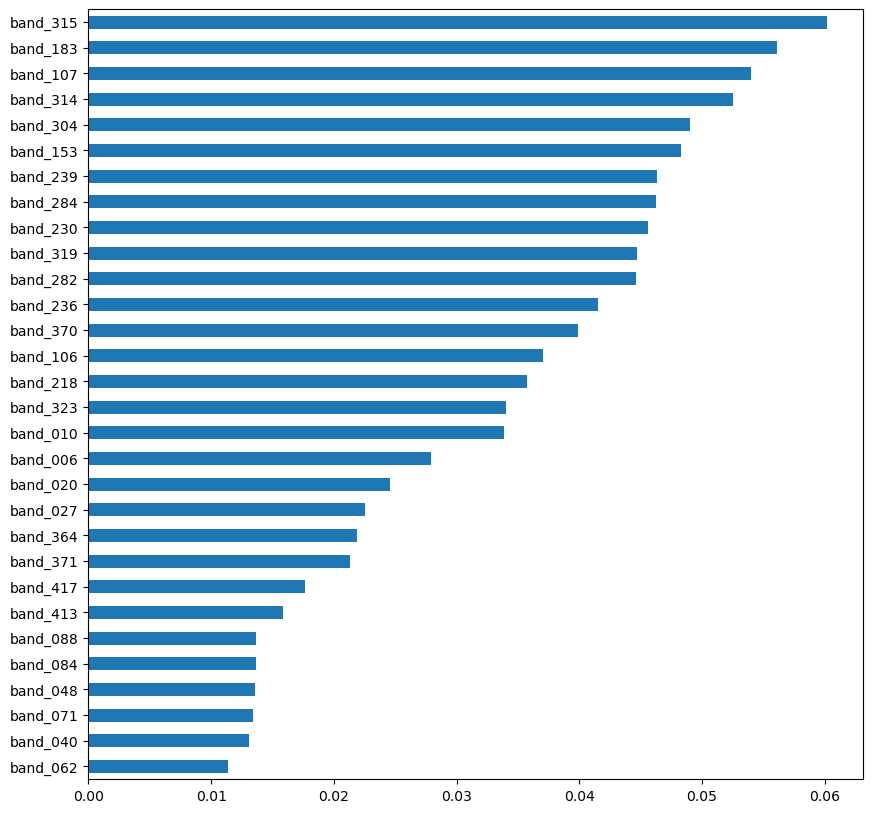

In [120]:

mdi_importances = pd.Series(
    model.feature_importances_, index=model.feature_names_in_
).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
mdi_importances.plot.barh(ax=ax)

In [ ]:
mdi_importances.index[::-1][:10]

Index(['band_015', 'band_002', 'band_118', 'band_105', 'band_153', 'band_188',
       'band_108', 'band_150', 'band_097', 'band_010'],
      dtype='object')

In [ ]:
mdi_importantDS = sampleDF[['label'] + list(mdi_importances.index[::-1][:10]) ]
mdi_importantDS

label  band_015  band_002  band_118  band_105  band_153  band_188  \
0    black spruce     203.0      75.0    3041.0    2854.0    3210.0    2472.0   
1    black spruce     195.0      89.0    2453.0    2171.0    2573.0    2342.0   
2    black spruce     182.0      78.0    2311.0    2067.0    2368.0    2265.0   
3    black spruce     231.0     108.0    2181.0    2026.0    2195.0    1910.0   
4    black spruce     228.0     127.0    2858.0    2611.0    2920.0    2839.0   
..            ...       ...       ...       ...       ...       ...       ...   
142  black spruce     372.0     219.0    4142.0    3633.0    4066.0    3371.0   
143  black spruce     301.0     169.0    3191.0    2903.0    3418.0    2764.0   
144  black spruce     264.0     141.0    3079.0    2797.0    3243.0    2864.0   
145  black spruce     339.0     241.0    3537.0    3236.0    3669.0    3413.0   
146  black spruce     228.0     142.0    3227.0    3007.0    3270.0    2562.0   

     band_108  band_150  band_097  band_010  
0      2866.0    3228.0    1705.0     185.0  
1      2248.0    2576.0    1385.0     158.0  
2      2179.0    2482.0    1351.0     142.0  
3      2074.0    2305.0    1273.0     181.0  
4      2736.0    3049.0    1641.0     250.0  
..        ...       ...       ...       ...  
142    3754.0    4380.0    2287.0     325.0  
143    3007.0    3463.0    1879.0     316.0  
144    2938.0    3311.0    1799.0     284.0  
145    3388.0    3900.0    2026.0     331.0  
146    3071.0    3462.0    1857.0     227.0  

[147 rows x 11 columns]

In [121]:
model.feature_names_in_

array(['band_282', 'band_010', 'band_230', 'band_088', 'band_239',
       'band_364', 'band_107', 'band_071', 'band_314', 'band_413',
       'band_040', 'band_183', 'band_371', 'band_006', 'band_218',
       'band_048', 'band_323', 'band_417', 'band_106', 'band_084',
       'band_319', 'band_284', 'band_020', 'band_236', 'band_062',
       'band_315', 'band_153', 'band_370', 'band_027', 'band_304'],
      dtype=object)

In [122]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X.values), columns=X.columns, index=X.index)   
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=300, max_depth=15)
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

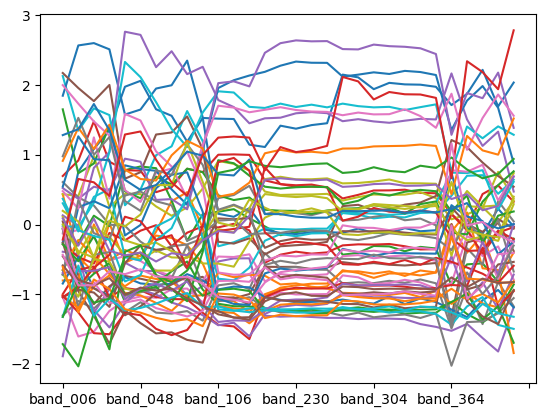

In [123]:
X_test.T.sort_index().plot(legend=False)


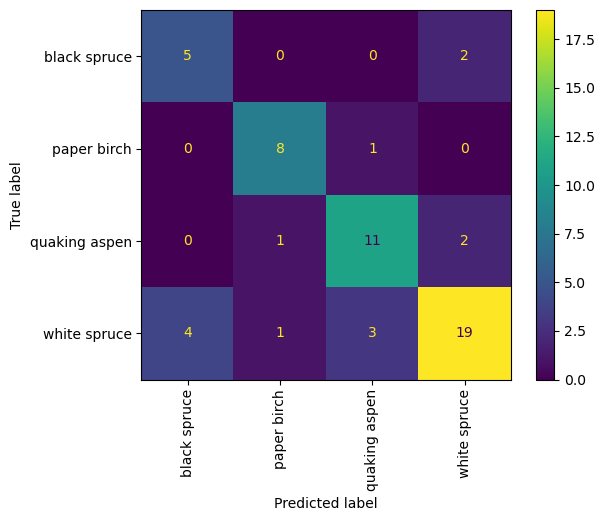

In [124]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical')


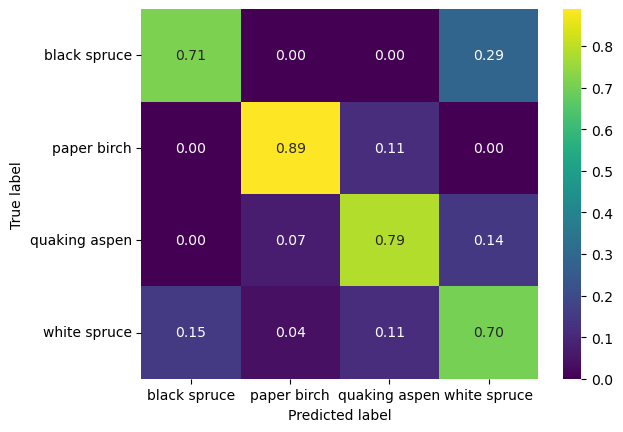

In [125]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [127]:
print(sklearn.metrics.precision_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.recall_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))



0.7543859649122807
0.7543859649122807
0.7543859649122807
               precision    recall  f1-score   support

 black spruce       0.56      0.71      0.63         7
  paper birch       0.80      0.89      0.84         9
quaking aspen       0.73      0.79      0.76        14
 white spruce       0.83      0.70      0.76        27

     accuracy                           0.75        57
    macro avg       0.73      0.77      0.75        57
 weighted avg       0.77      0.75      0.76        57

